In [1]:
import mercury as mr 


In [2]:
app = mr.App(title = "1d Partical in a Box solver", description = "uses Euler's method to solve for quantized energy values")
checkBoxSwitch = mr.Select(value = "Energy Test Value" , choices = ["Energy Test Value","Energy Level"],label = "Select Option" )
energy_value  = mr.Numeric(value =6 ,min = 0, max = 999, label = "Energy Test Value / Energy Level", step = 0)
box_size = mr.Numeric(value = 10, min = 1, max = 999, label = "Size of the well (angstrums)", step = 0)
mass_of_p = mr.Numeric(value = 1, min = 1, max = 999, label = "Mass of partical (electrons)", step = 0)
stepSize = mr.Numeric(value = 2500, min = 200, max = 9999999, label = "Size of step (box size)/(step size)", step = 0)

mercury.App

mercury.Select

mercury.Numeric

mercury.Numeric

mercury.Numeric

mercury.Numeric

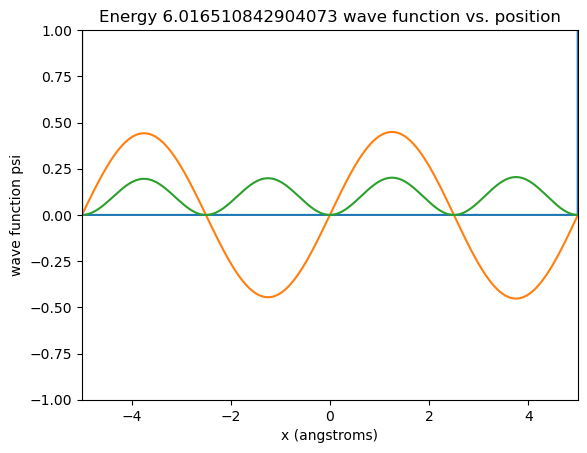

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jun  3 15:04:15 2019

@author: Dviolette, Jterry
"""



import sys 
import math

stdout =sys.stdout
sys.stdout = stdout

import numpy as np
import matplotlib.pyplot as plt
         
%matplotlib inline

#adjust these values to find the eigenvalues of the infinite square well
testValue = energy_value.value

#adjust this value to change the starting guess of the slope of the wavefunction in the shooting method
slopeGuess = 2.0

#adjust these valuesa to change the size of the box
with_of_box = box_size.value
#User choice to for output
choice = checkBoxSwitch.value

#adjust mass of particle
#m = 1/206.768  #mass of a Muon in relation to an electron under one
m = mass_of_p.value #mass of the electron

ħ2overme = 7.62 # planks constant squared over the mass of an electron on an electron units are electron volts angstrums squared
x_steps = int(stepSize.value)
yi=0
vi=0

#use this to change the size of the graph of the wavefunctions 
y_min=-1
y_max=1
x_min=-with_of_box / 2 
x_max=with_of_box / 2 

# Defines the 1D arrays to be used in the computation and # sets all values in the arrays to zero
psi_prime = np.zeros(x_steps)
psi = np.zeros(x_steps)
v_x = np.zeros(x_steps)

#functions used to shorten code  
def plots(X_value,Y_value,Y_min,Y_max,X_min,X_max,Yname,Xname,title):
    plt.plot(X_value, Y_value )
    plt.ylim((Y_min,Y_max))
    plt.xlim((X_min,X_max))
    plt.ylabel(Yname)
    plt.xlabel(Xname)
    plt.title(title)
    
def Eulers_method(B, i): 
    
    #Implement the shooting method
    #
    #
    #     Yi+1 = Yi + Y'i*Δx                      
    #     Y'i+1 = Y'i + Δx * 2*m*(V-E)                           
    #                        _________  Yi                     
    #                               2                            
    #                          hbar      
            
    psi[0]=0.0
    psi_prime[0]=slopeGuess
    i=i+1
    while i < len(xpoints):
        Δx = xpoints[i]-xpoints[i-1]
        psi[i]=psi[i-1]+Δx*psi_prime[i-1]
        psi_double_prime=m*2.0/ħ2overme*(v_x[i-1]-B)*psi[i-1]
        psi_prime[i]=psi_prime[i-1]+Δx*psi_double_prime
        i=i+1
 

#Set up the x axis points within the 1D Box and
#Populate the Potential Energy of the Infinite Square Well
i=0
xpoints = np.linspace(-with_of_box / 2, with_of_box / 2, x_steps)
while i < len(v_x):
    if i==0 :
        v_x[i] = 2000000
    if i==len(v_x)-1:
        v_x[i] = 2000000

    i=i+1
     
# Plotting Results
plots(xpoints,v_x,0,20,x_min,x_max,'potential (ev)','x (angstroms)','potential vs. position')


eigenEnergy = [0] * 999
q=0

#find the energy based on user choice
while q < len(eigenEnergy):

    eigenEnergy[q] = ((q+1)**2 * ħ2overme * math.pi ** 2)/(2*m*with_of_box**2)
    if(choice == "Energy Test Value"):
        if(testValue < eigenEnergy[q]):
            if(abs(eigenEnergy[q] - testValue) >= abs(eigenEnergy[q-1] - testValue)):
                testValue = eigenEnergy[q-1]
                break
            else:
                testValue = eigenEnergy[q]   
                break
    else:
        if(q==testValue):
            testValue = eigenEnergy[q]   
            break

    q = q + 1

#calulate waveform
i = 0
Eulers_method(testValue,i)
   
#Calculate the area under the probability curve Y*Ydx and normalize 
psistarpsi=psi*psi

total=sum(psistarpsi)
mean=total/(x_steps)
integral=mean*with_of_box
psistarpsi=psistarpsi/integral
psi=psi/np.sqrt(integral)

#plot normalized waveform 
plots(xpoints,psi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(testValue)+ ' wave function vs. position')
plots(xpoints,psistarpsi,y_min,y_max,x_min,x_max,'wave function psi','x (angstroms)','Energy '+ str(testValue)+ ' wave function vs. position')
plt.show()

message = [("Energy level N = " + str(q))]
mr.Chat(message)